<a href="https://colab.research.google.com/github/chessaanugrah/FraudDetectionML/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import WOEEncoder



from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import train_test_split

sns.set_style('whitegrid') # sets the visual style of Seaborn plots to 'whitegrid', which displays a white background with grid lines.
sns.set_palette('pastel')  # sets the color palette to 'pastel', which is one of the predefined color palettes provided by Seaborn. It consists of a set of visually distinct colors suitable for plotting categorical data.

import warnings
# Ignore all warnings
warnings.simplefilter("ignore")

Import Dataset

In [ ]:
# Membaca dataset dari file yang diupload

df = pd.read_csv('/content/drive/MyDrive/collabskripsi/Datset2/fraudTest.csv')

In [ ]:
# Membaca dataset dari file yang diupload

df = pd.read_csv('/content/drive/MyDrive/collabskripsi/Datset2/fraudTrain.csv')

EDA

In [ ]:
df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Memilih hanya kolom numerik
numeric_df = df.select_dtypes(include=[np.number])

# Menghitung statistik dasar
stats = numeric_df.describe().T  # Transpose untuk memudahkan pembacaan
stats['skew'] = numeric_df.apply(skew)  # Menghitung skewness
stats['kurtosis'] = numeric_df.apply(kurtosis)  # Menghitung kurtosis

# Menyusun DataFrame untuk menampilkan hasil
characteristics = stats[['mean', 'min', 'max', 'std', 'skew', 'kurtosis']]
characteristics.columns = ['MEAN', 'MIN', 'MAX', 'STD', 'SKEW', 'KURTOSIS']

# Menampilkan hasil
print("Deskripsi Statistik Data:")
print(characteristics)

Deskripsi Statistik Data:
                    MEAN           MIN           MAX           STD  \
Unnamed: 0  6.483370e+05  0.000000e+00  1.296674e+06  3.743180e+05   
cc_num      4.171920e+17  6.041621e+10  4.992346e+18  1.308806e+18   
amt         7.035104e+01  1.000000e+00  2.894890e+04  1.603160e+02   
zip         4.880067e+04  1.257000e+03  9.978300e+04  2.689322e+04   
lat         3.853762e+01  2.002710e+01  6.669330e+01  5.075808e+00   
long       -9.022634e+01 -1.656723e+02 -6.795030e+01  1.375908e+01   
city_pop    8.882444e+04  2.300000e+01  2.906700e+06  3.019564e+05   
unix_time   1.349244e+09  1.325376e+09  1.371817e+09  1.284128e+07   
merch_lat   3.853734e+01  1.902779e+01  6.751027e+01  5.109788e+00   
merch_long -9.022646e+01 -1.666712e+02 -6.695090e+01  1.377109e+01   
is_fraud    5.788652e-03  0.000000e+00  1.000000e+00  7.586269e-02   

                    SKEW     KURTOSIS  
Unnamed: 0 -5.169113e-15    -1.200000  
cc_num      2.851876e+00     6.179921  
amt         4

Visualisasi Distribusi Fitur Numerik

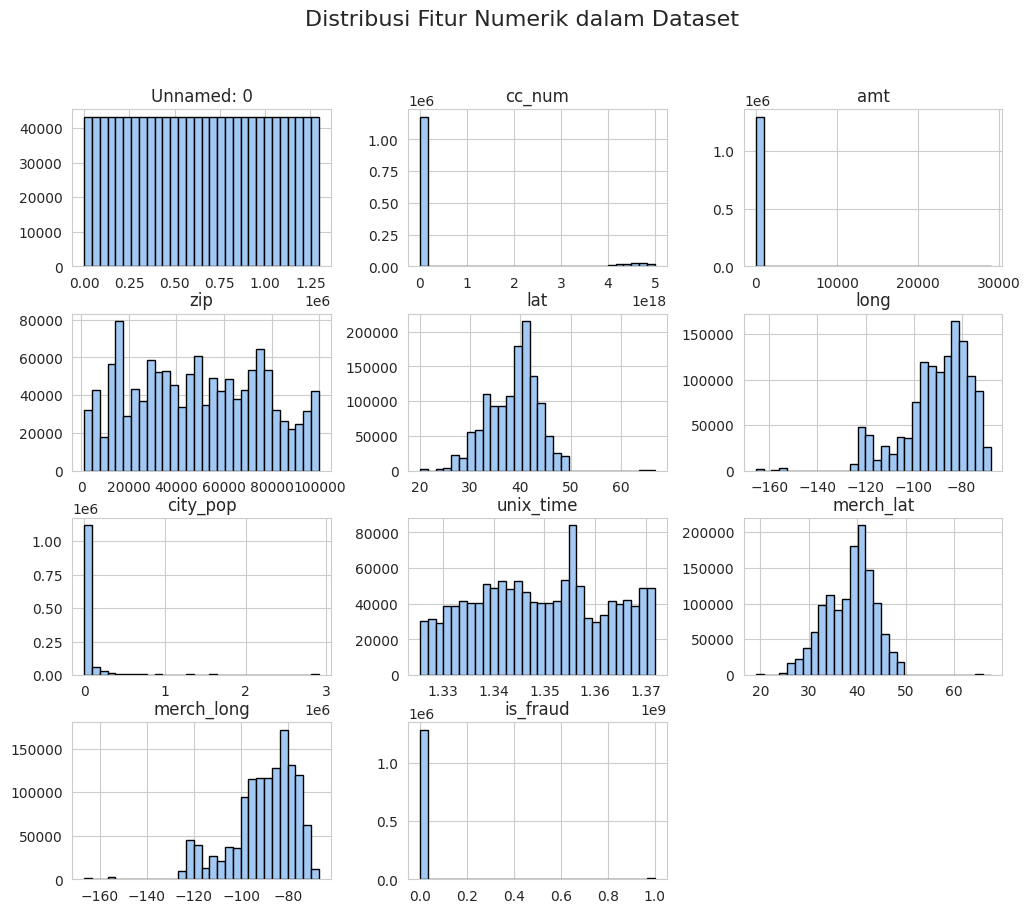

In [ ]:

# Memilih hanya kolom numerik
numeric_df = df.select_dtypes(include=[np.number])

# Plot histogram untuk setiap fitur numerik
numeric_df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Distribusi Fitur Numerik dalam Dataset', fontsize=16)
plt.show()


Visualisasi Histogram

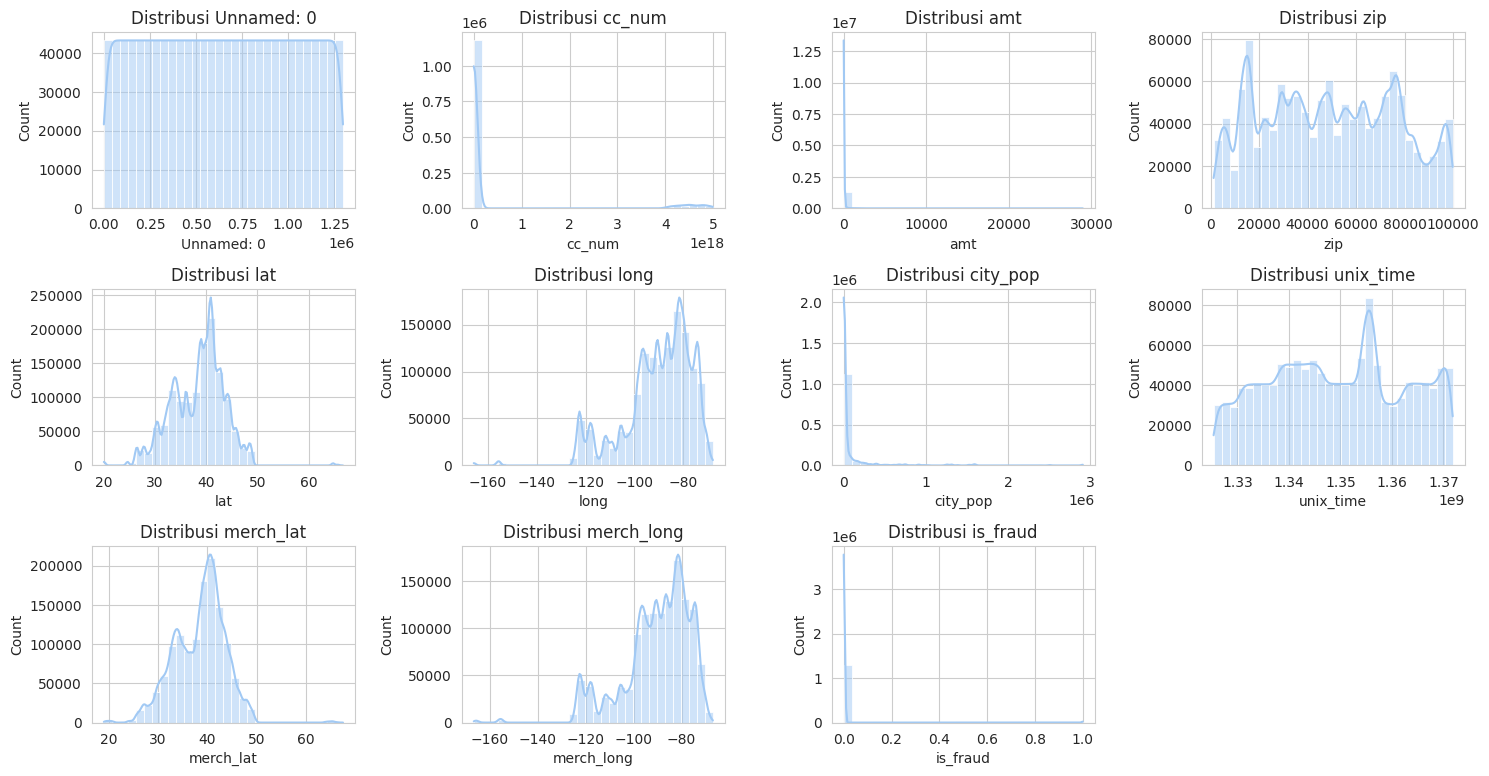

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_df.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(numeric_df[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()


Visualisasi Fitur Kategorikal

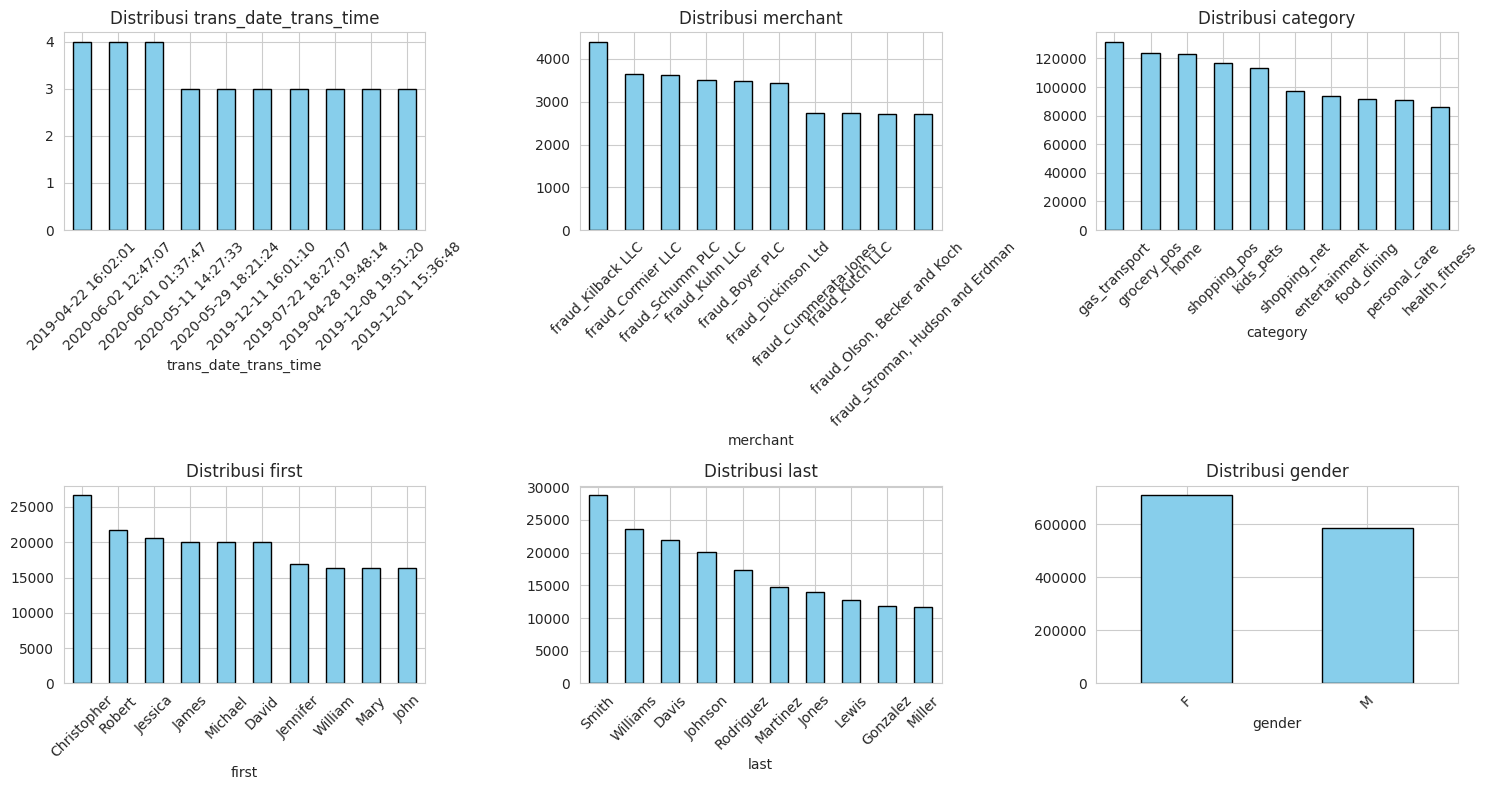

In [ ]:
# Memilih hanya kolom kategorikal
categorical_df = df.select_dtypes(include=['object'])

# Visualisasi distribusi fitur kategorikal
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_df.columns[:6]):  # Batasi ke 6 fitur pertama
    plt.subplot(2, 3, i+1)
    df[col].value_counts().head(10).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df.shape

(1296675, 23)

In [ ]:
is_fraud = df["is_fraud"].value_counts()
print("Yes: ",is_fraud[1])
print("No: ",is_fraud[0])

Yes:  7506
No:  1289169


In [ ]:
print(df.isna().sum().sum())
print(df.duplicated().sum())

0
0


Distribusi perbandingan penipuan gender laki laki dengan perempuan

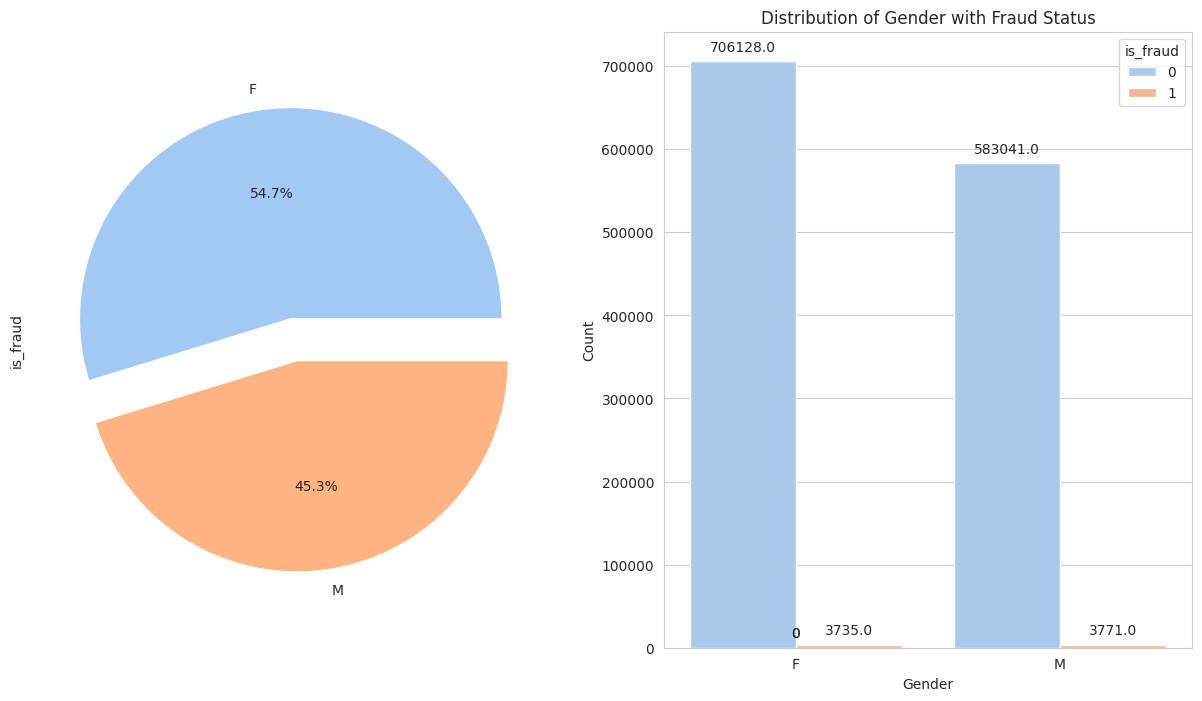

In [ ]:
fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(15, 8))

#Gender Distribution
explode = [0.1, 0.1]
df.groupby('gender')['is_fraud'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);

ax = sns.countplot(x="gender", hue="is_fraud", data=df,ax=axb[1])

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Set labels and title
plt.title("Distribution of Gender with Fraud Status")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()

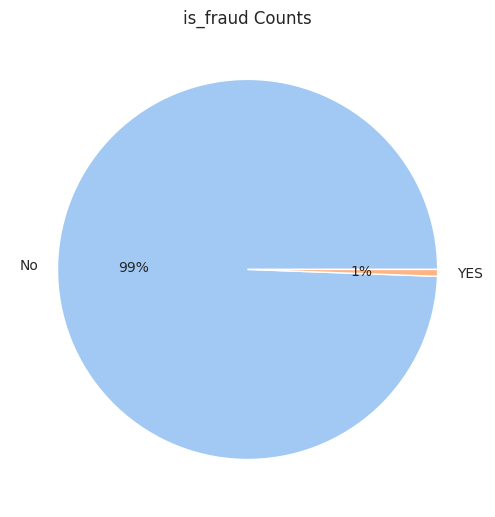

In [ ]:
is_fraud = df["is_fraud"].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(is_fraud, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Future engginering

In [ ]:
#Change date type from obj to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'],format='mixed')
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'],format='mixed')

In [ ]:
df['hour'] = df['trans_date_trans_time'].dt.hour
df['hour'] = df['trans_date_trans_time'].dt.hour

df['month'] = df['trans_date_trans_time'].dt.month
df['month'] = df['trans_date_trans_time'].dt.month

df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,month
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1


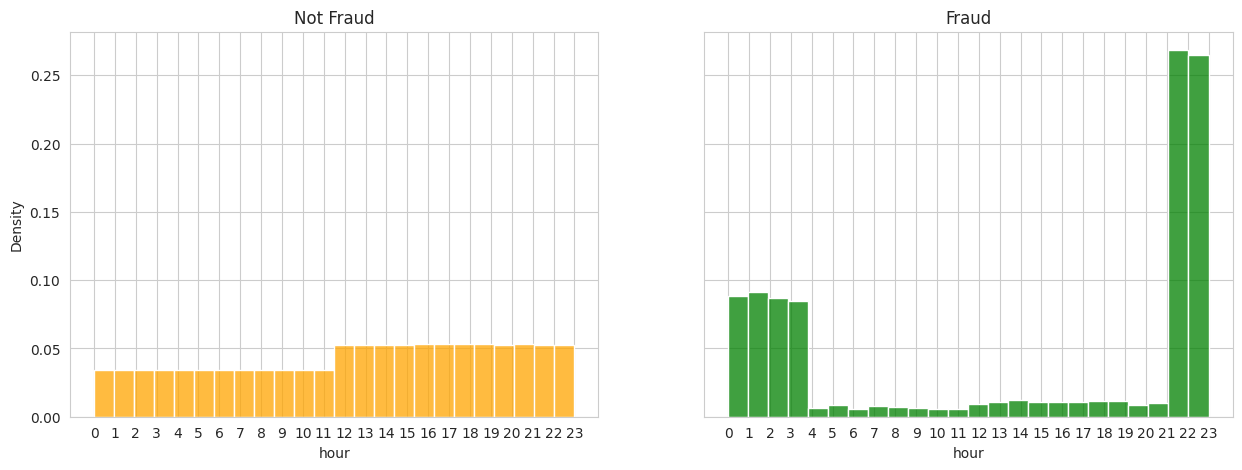

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)

ax1 = sns.histplot(x='hour', data=df[df["is_fraud"] == 0],
                   stat="density", bins=24, ax=ax1, color="orange")

ax2 = sns.histplot(x='hour', data=df[df["is_fraud"] == 1],
                   stat="density", bins=24, ax=ax2, color="green")

ax1.set_title("Not Fraud")
ax2.set_title("Fraud")
ax1.set_xticks(np.arange(24)) # ticks of the day 0 -> 23
ax2.set_xticks(np.arange(24));


Preprocesing

In [ ]:
unique_transaction_count = len(df['trans_num'].unique())
print("Total count of unique transaction numbers:", unique_transaction_count)

Total count of unique transaction numbers: 1296675


In [ ]:
# List kolom yang ingin dihapus
columns_to_drop = ['first', 'unix_time', 'dob', 'cc_num', 'zip', 'city', 'street', 'state','trans_num', 'trans_date_trans_time']

# Cek apakah kolom ada sebelum menghapusnya
print("Kolom sebelum penghapusan:", df.columns)

# Hapus kolom dengan errors='ignore' untuk menghindari KeyError
df = df.drop(columns=columns_to_drop, axis=1, errors='ignore')

# Cek hasil
print("Kolom setelah penghapusan:", df.columns)
df.head(3)


Kolom sebelum penghapusan: Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'hour', 'month'],
      dtype='object')
Kolom setelah penghapusan: Index(['Unnamed: 0', 'merchant', 'category', 'amt', 'last', 'gender', 'lat',
       'long', 'city_pop', 'job', 'merch_lat', 'merch_long', 'is_fraud',
       'hour', 'month'],
      dtype='object')


,Unnamed: 0,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,0,"fraud_Rippin, Kub and Mann",misc_net,4.97,Banks,F,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,0,1
1,1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,0,1
2,2,fraud_Lind-Buckridge,entertainment,220.11,Sanchez,M,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,0,1


In [ ]:
#clean merchant column
df['merchant'] = df['merchant'].apply(lambda x : x.replace('fraud_',''))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1296675 non-null  int64  
 1   merchant    1296675 non-null  object 
 2   category    1296675 non-null  object 
 3   amt         1296675 non-null  float64
 4   last        1296675 non-null  object 
 5   gender      1296675 non-null  object 
 6   lat         1296675 non-null  float64
 7   long        1296675 non-null  float64
 8   city_pop    1296675 non-null  int64  
 9   job         1296675 non-null  object 
 10  merch_lat   1296675 non-null  float64
 11  merch_long  1296675 non-null  float64
 12  is_fraud    1296675 non-null  int64  
 13  hour        1296675 non-null  int32  
 14  month       1296675 non-null  int32  
dtypes: float64(5), int32(2), int64(3), object(5)
memory usage: 138.5+ MB


In [ ]:
df.head(3)

,Unnamed: 0,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,0,"Rippin, Kub and Mann",misc_net,4.97,Banks,F,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,0,1
1,1,"Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,0,1
2,2,Lind-Buckridge,entertainment,220.11,Sanchez,M,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,0,1


In [ ]:
df.describe(include='object')

,merchant,category,last,gender,job
count,1296675,1296675,1296675,1296675,1296675
unique,693,14,481,2,494
top,Kilback LLC,gas_transport,Smith,F,Film/video editor
freq,4403,131659,28794,709863,9779


Data Encoding

In [ ]:
import numpy as np

def calculate_woe(data, target, feature):
    """
    Calculate Weight of Evidence (WOE) and return a mapping.
    """
    temp = data[[feature, target]].copy()
    temp['total'] = 1
    grouped = temp.groupby(feature).agg({
        target: 'sum',
        'total': 'count'
    }).reset_index()
    grouped['non_target'] = grouped['total'] - grouped[target]

    # Add a small value to avoid division by zero and inf values
    grouped['non_target'] = grouped['non_target'].replace(0, 1e-6)
    grouped[target] = grouped[target].replace(0, 1e-6)

    grouped['woe'] = np.log(
        (grouped['non_target'] / grouped['non_target'].sum()) /
        (grouped[target] / grouped[target].sum())
    )
    return grouped[[feature, 'woe']].set_index(feature).to_dict()['woe']

# Apply WOE encoding manually
for col in ['job', 'merchant', 'category', 'lat', 'last']:
    woe_map = calculate_woe(df, 'is_fraud', col)
    df[col] = df[col].map(woe_map)

In [ ]:
df.head(5)

,Unnamed: 0,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,0,-0.906324,-0.924103,4.97,16.284266,F,16.284266,-81.1781,3495,1.233790,36.011293,-82.048315,0,0,1
1,1,-0.627488,-0.898498,107.23,0.790826,F,16.685778,-118.2105,149,0.990694,49.159047,-118.186462,0,0,1
2,2,1.012516,0.851629,220.11,-0.417664,M,14.890050,-112.2620,4154,-1.004902,43.150704,-112.154481,0,0,1
3,3,0.521529,0.210727,45.00,-0.128348,M,-1.684490,-112.1138,1939,-0.313745,47.034331,-112.561071,0,0,1
4,4,0.431161,0.614805,41.96,-0.411388,M,16.278827,-79.4629,99,16.278827,38.674999,-78.632459,0,0,1


balancing data

Original Training Data Shape: (1037340, 13) (1037340,)
SMOTE Resampled Training Data Shape: (2062670, 13) (2062670,)
Test Data Shape: (259335, 13) (259335,)


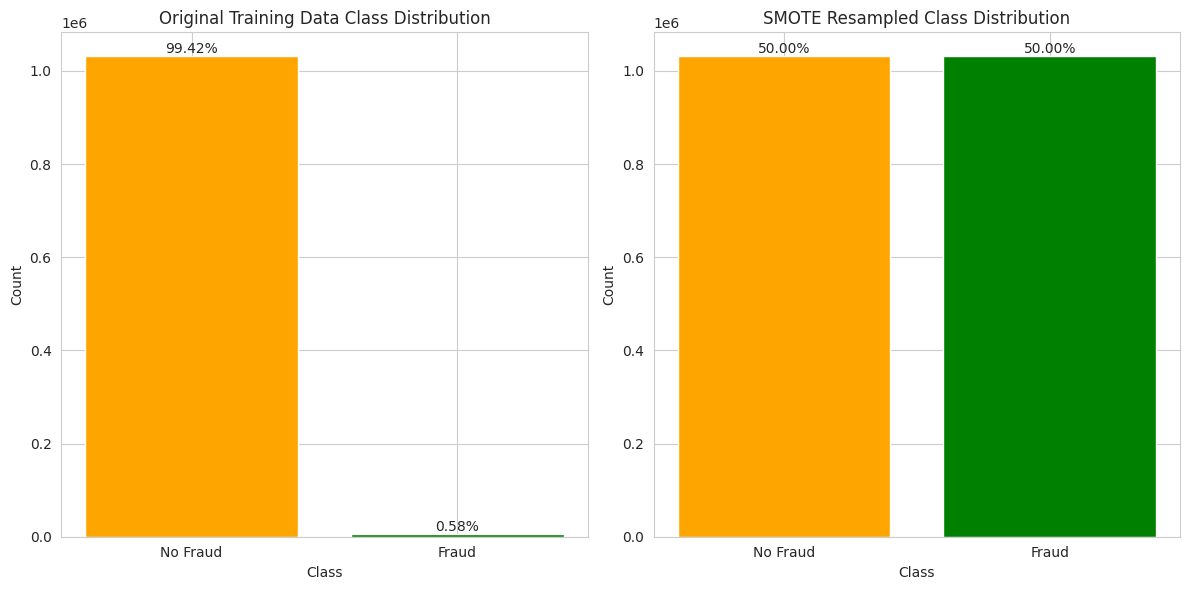

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  # Import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['is_fraud'])  # Pastikan 'is_fraud' adalah nama kolom target
y = df['is_fraud']  # Target label

# Memastikan hanya kolom numerik yang digunakan
X = X.select_dtypes(include=[np.number])

# Split data menjadi train dan test sebelum menerapkan SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65, stratify=y)

# 🔹 Terapkan SMOTE dengan Sampling Strategy yang Lebih Baik

# Oversampling dengan SMOTE (buat fraud = 50% dari mayoritas)
smote = SMOTE(sampling_strategy=1.0, random_state=65)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Undersampling (kurangi mayoritas agar rasio 50:50)
undersample = RandomUnderSampler(sampling_strategy=1.0, random_state=65)
X_train_balanced, y_train_balanced = undersample.fit_resample(X_train_smote, y_train_smote)
# 🔹 Normalisasi Data
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

# 🔹 Cek ukuran dataset sebelum dan sesudah SMOTE
print("Original Training Data Shape:", X_train.shape, y_train.shape)
print("SMOTE Resampled Training Data Shape:", X_train_smote.shape, y_train_smote.shape)
print("Test Data Shape:", X_test.shape, y_test.shape)

# 🔹 Hitung jumlah kelas dalam data awal dan setelah SMOTE
original_class_counts = y_train.value_counts()
smote_class_counts = y_train_smote.value_counts()

# 🔹 Hitung persentase masing-masing kelas
original_percentages = original_class_counts / len(y_train) * 100
smote_percentages = smote_class_counts / len(y_train_smote) * 100

# 🔹 Plot distribusi kelas sebelum dan sesudah SMOTE
plt.figure(figsize=(12, 6))

# Plot distribusi kelas pada data awal
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Training Data Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['No Fraud', 'Fraud'])

# Plot distribusi kelas setelah SMOTE
plt.subplot(1, 2, 2)
bars_2 = plt.bar(smote_class_counts.index, smote_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_2, smote_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('SMOTE Resampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(smote_class_counts.index, ['No Fraud', 'Fraud'])

plt.tight_layout()  # Sesuaikan tata letak agar tidak saling tumpang tindih
plt.show()


Original Training Data Shape: (1037340, 13) (1037340,)
SMOTE Resampled Training Data Shape: (2062670, 13) (2062670,)
Test Data Shape: (259335, 13) (259335,)


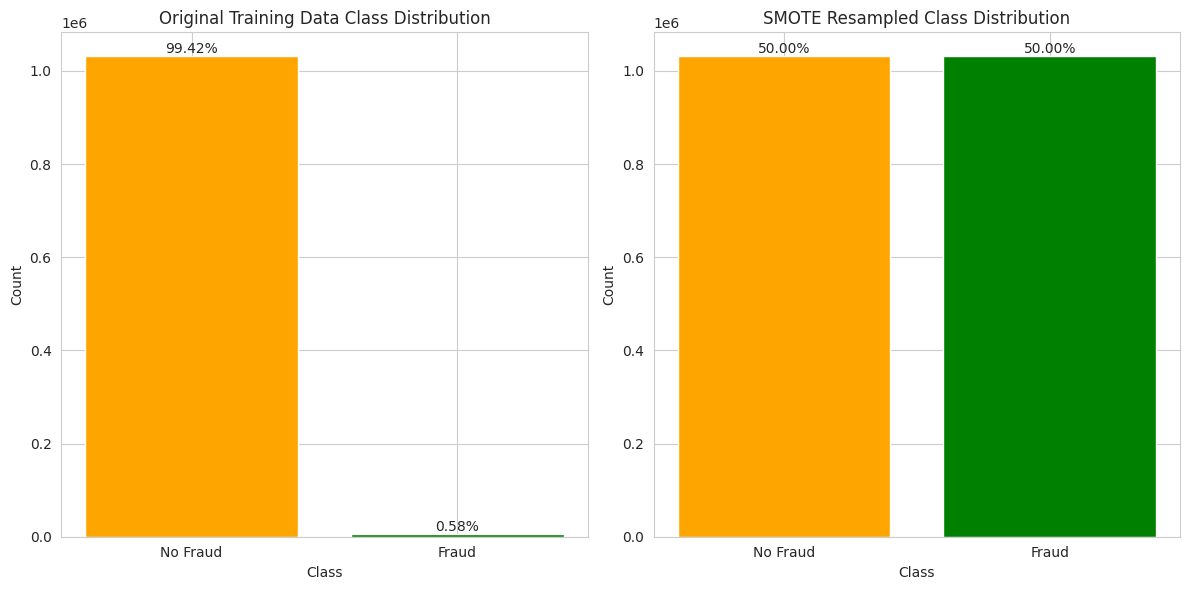

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  # Import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

from imblearn.over_sampling import BorderlineSMOTE
from imblearn.combine import SMOTETomek


# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['is_fraud'])  # Pastikan 'is_fraud' adalah nama kolom target
y = df['is_fraud']  # Target label

# Memastikan hanya kolom numerik yang digunakan
X = X.select_dtypes(include=[np.number])

# Split data menjadi train dan test sebelum menerapkan SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65, stratify=y)

# 🔹 Terapkan SMOTE dengan Sampling Strategy yang Lebih Baik
smote_tomek = SMOTETomek(sampling_strategy=0.8, random_state=65)
X_train_final, y_train_final = smote_tomek.fit_resample(X_train, y_train)

# 🔹 BorderlineSMOTE agar data lebih representatif
#smote = BorderlineSMOTE(sampling_strategy=0.5, random_state=65)
#X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 🔹 Undersampling hanya sedikit, tidak terlalu agresif
#undersample = RandomUnderSampler(sampling_strategy=0.7, random_state=65)
#X_train_final, y_train_final = undersample.fit_resample(X_train_smote, y_train_smote)

# Oversampling dengan SMOTE (buat fraud = 50% dari mayoritas)
#smote = SMOTE(sampling_strategy=1.0, random_state=65)
#X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Undersampling (kurangi mayoritas agar rasio 50:50)
#undersample = RandomUnderSampler(sampling_strategy=1.0, random_state=65)
#X_train_balanced, y_train_balanced = undersample.fit_resample(X_train_smote, y_train_smote)

# 🔹 Normalisasi Data
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

# 🔹 Cek ukuran dataset sebelum dan sesudah SMOTE
print("Original Training Data Shape:", X_train.shape, y_train.shape)
print("SMOTE Resampled Training Data Shape:", X_train_smote.shape, y_train_smote.shape)
print("Test Data Shape:", X_test.shape, y_test.shape)

# 🔹 Hitung jumlah kelas dalam data awal dan setelah SMOTE
original_class_counts = y_train.value_counts()
smote_class_counts = y_train_smote.value_counts()

# 🔹 Hitung persentase masing-masing kelas
original_percentages = original_class_counts / len(y_train) * 100
smote_percentages = smote_class_counts / len(y_train_smote) * 100

# 🔹 Plot distribusi kelas sebelum dan sesudah SMOTE
plt.figure(figsize=(12, 6))

# Plot distribusi kelas pada data awal
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Training Data Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['No Fraud', 'Fraud'])

# Plot distribusi kelas setelah SMOTE
plt.subplot(1, 2, 2)
bars_2 = plt.bar(smote_class_counts.index, smote_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_2, smote_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('SMOTE Resampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(smote_class_counts.index, ['No Fraud', 'Fraud'])

plt.tight_layout()  # Sesuaikan tata letak agar tidak saling tumpang tindih
plt.show()


In [ ]:
# Cetak ukuran dataset setelah train-test split
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (1037340, 13), y_train shape: (1037340,)
X_test shape: (259335, 13), y_test shape: (259335,)


In [ ]:
# Menghitung distribusi label untuk data pelatihan asli
original_class_counts = y_train.value_counts()
original_percentages = original_class_counts / len(y_train) * 100

# Menghitung distribusi label untuk data pelatihan setelah SMOTE
smote_class_counts = y_train_smote.value_counts()
smote_percentages = smote_class_counts / len(y_train_smote) * 100

# Menghitung distribusi label untuk data pengujian
test_class_counts = y_test.value_counts()
test_percentages = test_class_counts / len(y_test) * 100

# Menampilkan hasil
print("Original Training Data Class Distribution:")
print(original_class_counts)
print("Original Training Data Class Percentages:")
print(original_percentages)

print("\nSMOTE Resampled Training Data Class Distribution:")
print(smote_class_counts)
print("SMOTE Resampled Training Data Class Percentages:")
print(smote_percentages)

print("\nTest Data Class Distribution:")
print(test_class_counts)
print("Test Data Class Percentages:")
print(test_percentages)

Original Training Data Class Distribution:
is_fraud
0    1031335
1       6005
Name: count, dtype: int64
Original Training Data Class Percentages:
is_fraud
0    99.421116
1     0.578884
Name: count, dtype: float64

SMOTE Resampled Training Data Class Distribution:
is_fraud
0    1031335
1    1031335
Name: count, dtype: int64
SMOTE Resampled Training Data Class Percentages:
is_fraud
0    50.0
1    50.0
Name: count, dtype: float64

Test Data Class Distribution:
is_fraud
0    257834
1      1501
Name: count, dtype: int64
Test Data Class Percentages:
is_fraud
0    99.421212
1     0.578788
Name: count, dtype: float64


In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Misalkan df adalah DataFrame yang berisi data Anda
# df = pd.read_csv('data.csv')  # Ganti dengan cara Anda membaca data

# Memilih hanya kolom numerik
numeric_df = df.select_dtypes(include=[np.number])

# Menghitung statistik dasar
stats = numeric_df.describe().T  # Transpose untuk memudahkan pembacaan
stats['skew'] = numeric_df.apply(skew)  # Menghitung skewness
stats['kurtosis'] = numeric_df.apply(kurtosis)  # Menghitung kurtosis

# Menyusun DataFrame untuk menampilkan hasil
characteristics = stats[['mean', 'min', 'max', 'std', 'skew', 'kurtosis']]
characteristics.columns = ['MEAN', 'MIN', 'MAX', 'STD', 'SKEW', 'KURTOSIS']

# Menampilkan hasil
print("Deskripsi Karakteristik Data:")
print(characteristics)

Deskripsi Karakteristik Data:
                     MEAN         MIN           MAX            STD  \
Unnamed: 0  648337.000000    0.000000  1.296674e+06  374317.974488   
merchant         0.638251   -1.511759  1.649869e+01       2.023497   
category         0.379171   -1.121721  1.322745e+00       0.844356   
amt             70.351035    1.000000  2.894890e+04     160.316039   
last             1.091980  -21.906000  1.671184e+01       3.876072   
lat              3.867207  -21.906000  1.671601e+01       6.910806   
long           -90.226335 -165.672300 -6.795030e+01      13.759077   
city_pop     88824.440563   23.000000  2.906700e+06  301956.360689   
job              1.297043  -21.906000  1.739594e+01       4.265703   
merch_lat       38.537338   19.027785  6.751027e+01       5.109788   
merch_long     -90.226465 -166.671242 -6.695090e+01      13.771091   
is_fraud         0.005789    0.000000  1.000000e+00       0.075863   
hour            12.804858    0.000000  2.300000e+01       6.

Modeling data

Logistic Regression -> LR

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

# Melatih model Logistic Regression dengan data hasil SMOTE
LR_model = LogisticRegression()
LR_model.fit(X_train_smote, y_train_smote)  # Menggunakan data yang sudah di-SMOTE

# Membuat prediksi pada data test
predict_LR = LR_model.predict(X_test)

# Menampilkan classification report
print(classification_report(y_test, predict_LR))

# Menghitung akurasi model
LR_accuracy = accuracy_score(y_test, predict_LR)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy * 100))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257834
           1       0.09      0.02      0.03      1501

    accuracy                           0.99    259335
   macro avg       0.54      0.51      0.51    259335
weighted avg       0.99      0.99      0.99    259335

Logistic Regression accuracy is: 99.32%


Support Vector Machine SVM

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# Melatih model SVM dengan data hasil SMOTE
svm_model = LinearSVC()
svm_model.fit(X_train_smote, y_train_smote)

# Membuat prediksi pada data test
predict_svm = svm_model.predict(X_test)

# Menampilkan classification report
print(classification_report(y_test, predict_svm))

# Menghitung akurasi model dengan benar
svm_accuracy = accuracy_score(y_test, predict_svm)
print('SVC model accuracy is: {:.2f}%'.format(svm_accuracy * 100))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257834
           1       0.08      0.01      0.02      1501

    accuracy                           0.99    259335
   macro avg       0.54      0.50      0.51    259335
weighted avg       0.99      0.99      0.99    259335

SVC model accuracy is: 99.35%


GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Membuat dan melatih model Gaussian Naïve Bayes dengan data hasil SMOTE
NB_model = GaussianNB()
NB_model.fit(X_train_smote, y_train_smote)

# Membuat prediksi pada data uji
y_pred_naive = NB_model.predict(X_test)

# Menampilkan classification report
print(classification_report(y_test, y_pred_naive))


# Menghitung akurasi model dengan benar
GaussianNB_accuracy = accuracy_score(y_test, y_pred_naive)
print('Naive Bayes model accuracy is: {:.2f}%'.format(GaussianNB_accuracy * 100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    257834
           1       0.01      1.00      0.01      1501

    accuracy                           0.01    259335
   macro avg       0.00      0.50      0.01    259335
weighted avg       0.00      0.01      0.00    259335

Naive Bayes model accuracy is: 0.58%


Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Terapkan SMOTE pada data latih
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Buat model Decision Tree
DT = DecisionTreeClassifier(max_depth=5, random_state=0)  # max_depth lebih fleksibel
DT.fit(X_train_smote, y_train_smote)

# Lakukan prediksi pada data uji
predict_DecisionTree = DT.predict(X_test)

# Evaluasi performa model
print(classification_report(y_test, predict_DecisionTree))
DT_accuracy = accuracy_score(y_test, predict_DecisionTree)
print('Decision Tree model accuracy is: {:.2f}%'.format(DT_accuracy * 100))


              precision    recall  f1-score   support

           0       1.00      0.92      0.96    257834
           1       0.05      0.81      0.10      1501

    accuracy                           0.92    259335
   macro avg       0.53      0.87      0.53    259335
weighted avg       0.99      0.92      0.95    259335

Decision Tree model accuracy is: 91.80%


XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Terapkan SMOTE pada data latih
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Inisialisasi dan latih model XGBoost
XGB = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric="logloss")
XGB.fit(X_train_smote, y_train_smote)

# Lakukan prediksi pada data uji
predict_XGB = XGB.predict(X_test)

# Evaluasi performa model
print(classification_report(y_test, predict_XGB))
XGB_accuracy = accuracy_score(y_test, predict_XGB)
print('XGBoost model accuracy is: {:.2f}%'.format(XGB_accuracy * 100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.58      0.89      0.70      1501

    accuracy                           1.00    259335
   macro avg       0.79      0.94      0.85    259335
weighted avg       1.00      1.00      1.00    259335

XGBoost model accuracy is: 99.56%


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Terapkan SMOTE pada data latih
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Inisialisasi dan latih model Random Forest
RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(X_train_smote, y_train_smote)

# Lakukan prediksi pada data uji
predict_RF = RF.predict(X_test)

# Evaluasi performa model
print(classification_report(y_test, predict_RF))
RF_accuracy = accuracy_score(y_test, predict_RF)
print('Random Forest model accuracy is: {:.2f}%'.format(RF_accuracy * 100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.85      0.78      0.82      1501

    accuracy                           1.00    259335
   macro avg       0.92      0.89      0.91    259335
weighted avg       1.00      1.00      1.00    259335

Random Forest model accuracy is: 99.79%


In [ ]:
Algorithms = ['XGBClassifier', 'RandomForest', 'DecissionTree', 'Logistic Regression', 'SVC', 'GaussianNB']
accuracy = [XGB_accuracy, RF_accuracy, DT_accuracy, LR_accuracy, svm_accuracy, GaussianNB_accuracy]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'Accuracy':accuracy})

FinalResult

,Algorithm,Accuracy
0,XGBClassifier,0.995616
1,RandomForest,0.997945
2,DecissionTree,0.917990
3,Logistic Regression,0.993225
4,SVC,0.993537
5,GaussianNB,0.005788


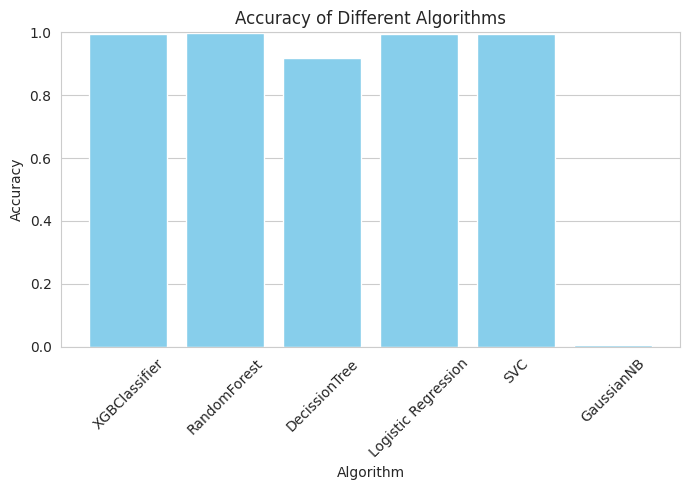

In [ ]:
plt.figure(figsize=(7, 5))
plt.bar(FinalResult['Algorithm'], FinalResult['Accuracy'], color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0, 1)  # Set the limit of y-axis from 0 to 1 (accuracy ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='x')  # Add gridlines only along the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Hyperparametertuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. Logistic Regression
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
log_reg_grid = GridSearchCV(LogisticRegression(), log_reg_params, cv=5)
log_reg_grid.fit(X_train, y_train)
best_log_reg = log_reg_grid.best_estimator_


In [ ]:
# 2. Decision Tree (ID3)
dt_params = {'max_depth': [3, 5, 10, None], 'criterion': ['gini', 'entropy']}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_params = {'var_smoothing': np.logspace(-9, -1, 10)}

grid_nb = GridSearchCV(GaussianNB(), nb_params, cv=5, scoring='f1', n_jobs=-1)
grid_nb.fit(X_train_final, y_train_final)

best_nb = grid_nb.best_estimator_
y_pred_nb = best_nb.predict(X_test)



In [ ]:
# 4. XGBoost
from xgboost import XGBClassifier
xgb_params = {'n_estimators': [10, 50, 100], 'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [3, 5, 10]}
xgb_grid = GridSearchCV(XGBClassifier(), xgb_params, cv=5)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

In [ ]:
# Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_params = {
    'n_estimators': [10, 50],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train_smote, y_train_smote)
best_rf = rf_grid.best_estimator_


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_params = {
    'C': [0.01, 0.1],  # Kurangi nilai C untuk mengurangi kompleksitas
    'kernel': ['linear'],
    'max_iter': [10000]  # Batasi iterasi agar tidak berjalan terlalu lama
}

svm_grid = GridSearchCV(SVC(), svm_params, cv=3, n_jobs=-1)  # Gunakan cv=3 agar lebih cepat
svm_grid.fit(X_train_smote, y_train_smote)

best_svm = svm_grid.best_estimator_

In [ ]:
print("Best parameters for XGBoost:", xgb_grid.best_params_)
print("Best parameters for Random Forest:", rf_grid.best_params_)
print("Best parameters for Decision Tree:", dt_grid.best_params_)
print("Best parameters for SVM:", svm_grid.best_params_)
print("Best parameters for Logistic Regression:", log_reg_grid.best_params_)


Best parameters for XGBoost: {'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 100}
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10}
Best parameters for SVM: {'C': 0.1, 'kernel': 'linear', 'max_iter': 10000}
Best parameters for Logistic Regression: {'C': 1, 'solver': 'lbfgs'}


In [ ]:
# Menghitung akurasi setelah hyperparameter tuning
best_log_reg_acc = accuracy_score(y_test, best_log_reg.predict(X_test))
best_dt_acc = accuracy_score(y_test, best_dt.predict(X_test))
best_nb_acc = accuracy_score(y_test, best_nb.predict(X_test))
best_xgb_acc = accuracy_score(y_test, best_xgb.predict(X_test))
best_svm_acc = accuracy_score(y_test, best_svm.predict(X_test))
best_rf_acc = accuracy_score(y_test, best_rf.predict(X_test))

# Membuat DataFrame hasil akurasi setelah tuning
Algorithms_Tuned = ['XGBClassifier (Tuned)', 'RandomForest (Tuned)', 'DecisionTree (Tuned)', 'Logistic Regression (Tuned)', 'svm (Tuned)' ,'GaussianNB (Tuned)']
accuracy_tuned = [best_xgb_acc, best_rf_acc, best_dt_acc, best_log_reg_acc, best_svm_acc, best_nb_acc]

FinalResult_Tuned = pd.DataFrame({'Algorithm': Algorithms_Tuned, 'Accuracy': accuracy_tuned})

# Menampilkan tabel hasil
print(FinalResult_Tuned)

                     Algorithm  Accuracy
0        XGBClassifier (Tuned)  0.998600
1         RandomForest (Tuned)  0.980446
2         DecisionTree (Tuned)  0.997941
3  Logistic Regression (Tuned)  0.994189
4                  svm (Tuned)  0.980801
5           GaussianNB (Tuned)  0.972626


Akurasi Setelah Hyperparameter tuning

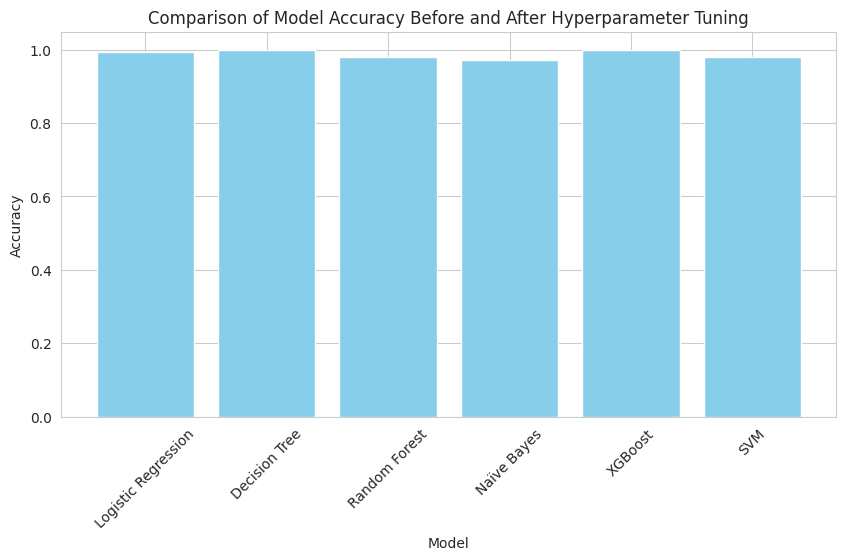

In [ ]:
# Evaluasi model setelah tuning
models = {'Logistic Regression': best_log_reg,
          'Decision Tree': best_dt,
          'Random Forest': best_rf,
          'Naïve Bayes': best_nb,
          'XGBoost': best_xgb,
          'SVM': best_svm}  # Tambahkan SVM

accuracy_results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy_results[name] = accuracy_score(y_test, y_pred)

# Plot perbandingan sebelum dan sesudah tuning
plt.figure(figsize=(10, 5))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy Before and After Hyperparameter Tuning')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

# Daftar model terbaik setelah tuning
models = {
    "Logistic Regression": best_log_reg,
    "Decision Tree": best_dt,
    "Random Forest": best_rf,
    "Naïve Bayes": best_nb,
    "XGBoost": best_xgb,
    "SVM": best_svm
}

# Menentukan jumlah lipatan (k) dalam cross-validation
cv_folds = 25  # 25-Fold Cross Validation

# Menyimpan hasil akurasi untuk setiap model
results = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv_folds, scoring='accuracy')
    results[name] = scores

# Membuat DataFrame hasil validasi
df_results = pd.DataFrame(results)
df_results.index.name = "Fold ke-"
df_results.columns.name = "Akurasi"

# Menambahkan rata-rata di baris terakhir
df_results.loc['Rata-rata'] = df_results.mean()

# Menampilkan tabel hasil validasi
print(df_results)

Akurasi    Logistic Regression  Decision Tree  Random Forest  Naïve Bayes  \
Fold ke-                                                                    
0                     0.993985       0.010739       0.008888     0.988201   
1                     0.994602       0.996973       0.996973     0.991363   
2                     0.994640       0.997898       0.997725     0.988760   
3                     0.994467       0.997706       0.996587     0.988066   
4                     0.994775       0.997841       0.997243     0.990784   
5                     0.994081       0.998265       0.997185     0.988509   
6                     0.994409       0.997976       0.997069     0.987757   
7                     0.993927       0.997455       0.996472     0.987102   
8                     0.993618       0.997609       0.996684     0.988316   
9                     0.994120       0.998091       0.997301     0.991285   
10                    0.994447       0.997744       0.997012     0.988625   

=== Logistic Regression ===
Akurasi  : 0.9942
Presisi  : 0.4883
Recall   : 0.0833
F1-Score : 0.1423
AUC      : 0.8807794346110457



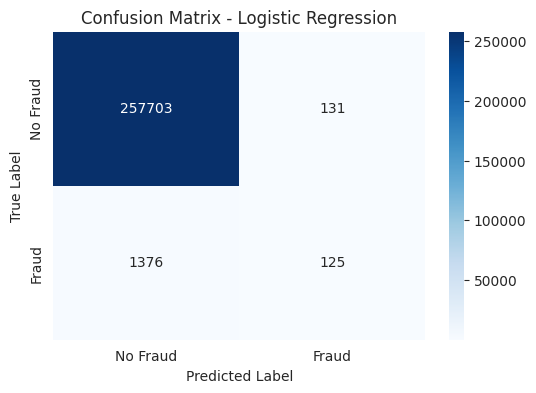

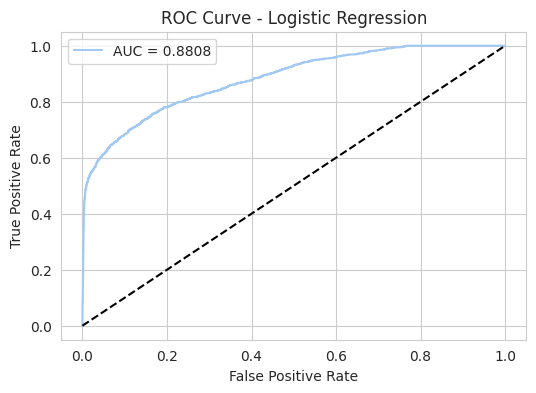

=== Decision Tree ===
Akurasi  : 0.9979
Presisi  : 0.8810
Recall   : 0.7448
F1-Score : 0.8072
AUC      : 0.977279703387856



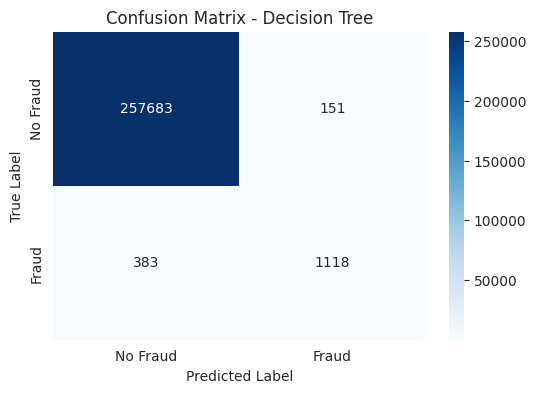

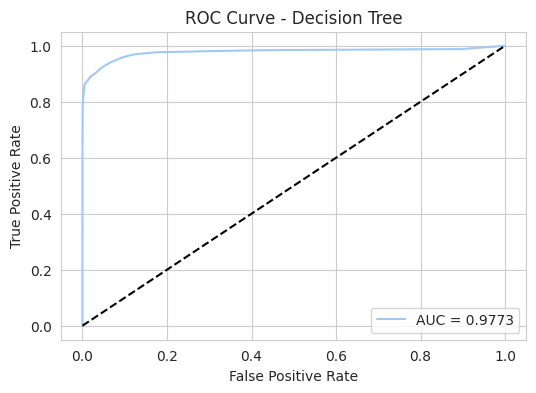

=== Random Forest ===
Akurasi  : 0.9804
Presisi  : 0.2028
Recall   : 0.8115
F1-Score : 0.3245
AUC      : 0.9799327733175206



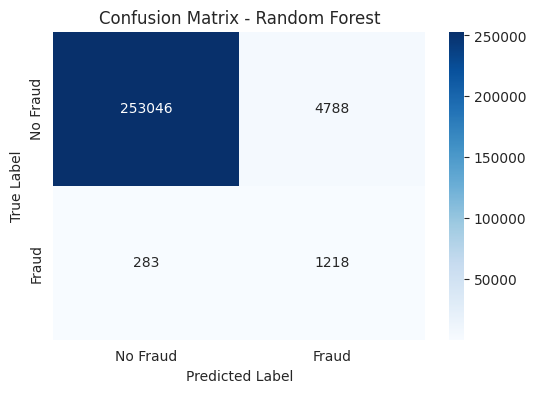

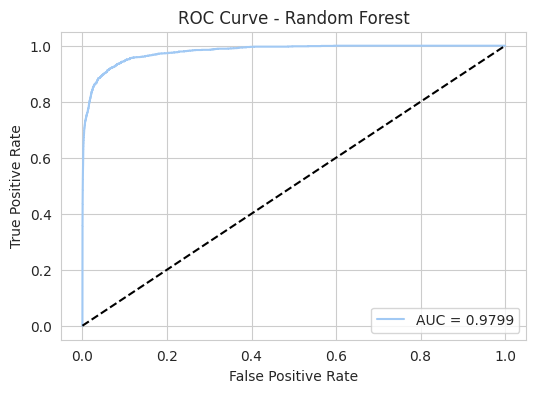

=== Naïve Bayes ===
Akurasi  : 0.9726
Presisi  : 0.1266
Recall   : 0.6322
F1-Score : 0.2110
AUC      : 0.8771059047711557



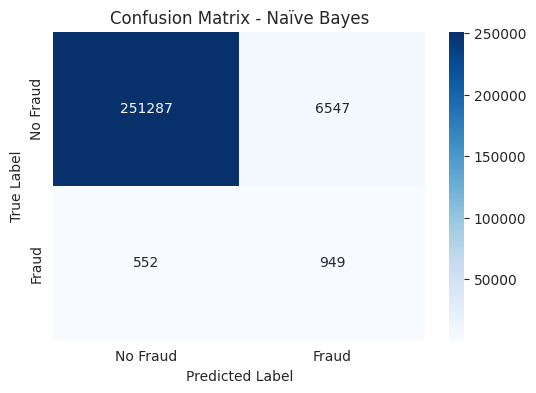

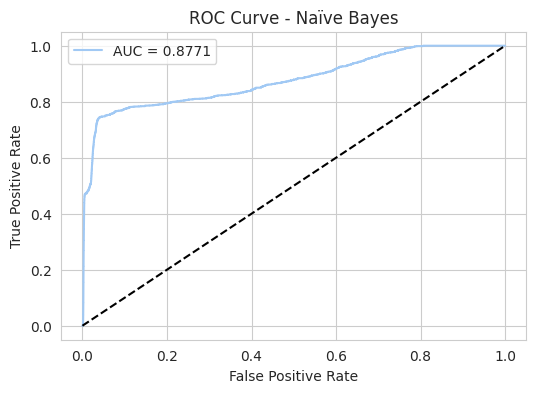

=== XGBoost ===
Akurasi  : 0.9986
Presisi  : 0.9272
Recall   : 0.8228
F1-Score : 0.8719
AUC      : 0.9984643528834796



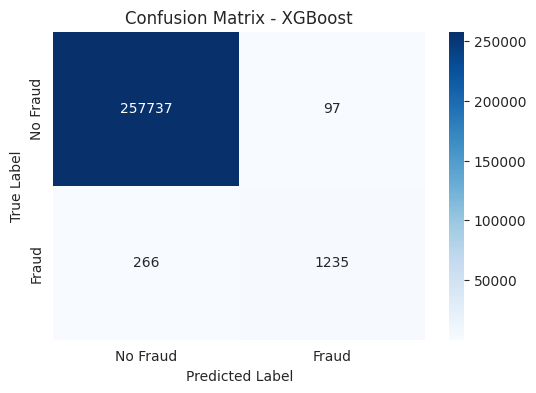

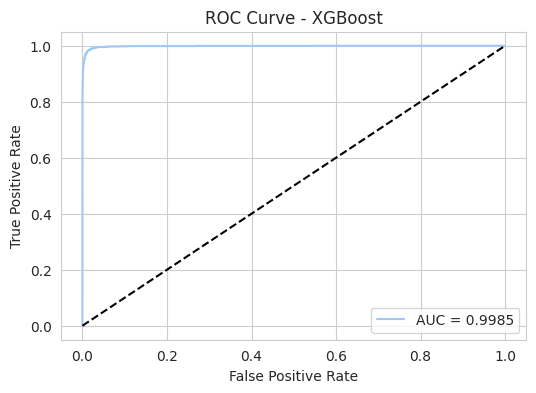

=== SVM ===
Akurasi  : 0.9808
Presisi  : 0.0099
Recall   : 0.0233
F1-Score : 0.0139
AUC      : Tidak tersedia



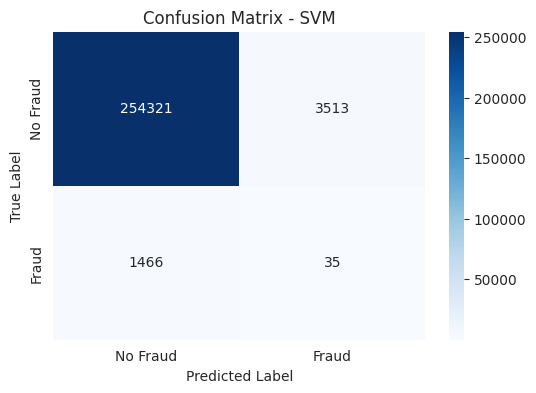

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)

# Model terbaik setelah tuning
models = {
    "Logistic Regression": best_log_reg,
    "Decision Tree": best_dt,
    "Random Forest": best_rf,
    "Naïve Bayes": best_nb,
    "XGBoost": best_xgb,
    "SVM": best_svm
}

# Evaluasi setiap model
for name, model in models.items():
    y_pred = model.predict(X_test)

    # Cek apakah model memiliki `predict_proba` untuk menghitung AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif
    else:
        y_proba = None

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "Tidak tersedia"

    # Menampilkan hasil evaluasi
    print(f"=== {name} ===")
    print(f"Akurasi  : {accuracy:.4f}")
    print(f"Presisi  : {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print(f"AUC      : {auc}\n")

    # Menampilkan Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # Plot ROC Curve jika model mendukung AUC
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
        plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal sebagai baseline
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend()
        plt.show()
